# ***Dry Bean Variety Detection***

# 1. Introduction

Dry bean is one of the most cultivated edible legume crops in the world. To seggregate it based on its variety is essential for marketing as well as production. This project is based on a dataset, which was collected as part of a computer vision project published in Science Direct. As part of this study, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimension and 4 shape forms, were obtained from the grains. With this data, a machine learning model can be developed to seggregate the beans or to predict the variety of the beans.

# 2. Objective

Implement machine learning models to predict the dry bean variety

# 3. Data Loading and Preprocessing

## 3.1 Import Libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 3.2 Load Data Set

In [133]:
df=pd.read_excel('Dry_Bean_Dataset.xlsx')

## 3.3 Familiarise Data

### 3.3.1 Check the dimensions

In [134]:
df.shape

(13611, 17)

Number of rows= 13611  
Number of columns= 17

### 3.3.2 Check a few instances of the data set

In [135]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


These are the first 5 rows from the top of the data set

### 3.3.3 Check the colomns and their data types

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Columns of different data types are present in this data set. Only Class column has object data type. Since class is the target variable here, all the feature columns are of numerical data type.

### 3.3.4 Statistical details of the data

In [137]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## 3.4 Find Missing Data

In [138]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

This data set does not contain duplicates

### 3.4.1 Find Duplicates

In [139]:
df.duplicated().sum()

np.int64(68)

There are 68 duplicates, which need to be deleted

In [140]:
df = df.drop_duplicates()

In [141]:
#Ensure that the duplicates are removed
df.duplicated().sum()

np.int64(0)

All the duplicates are removed

In [142]:
#Shape of the data set after removing duplicates
df.shape

(13543, 17)

## 3.5 Outlier Detection

### 3.5.1 Box Plot

Find out the numerical columns from the data

In [143]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

Plot box plot for each column

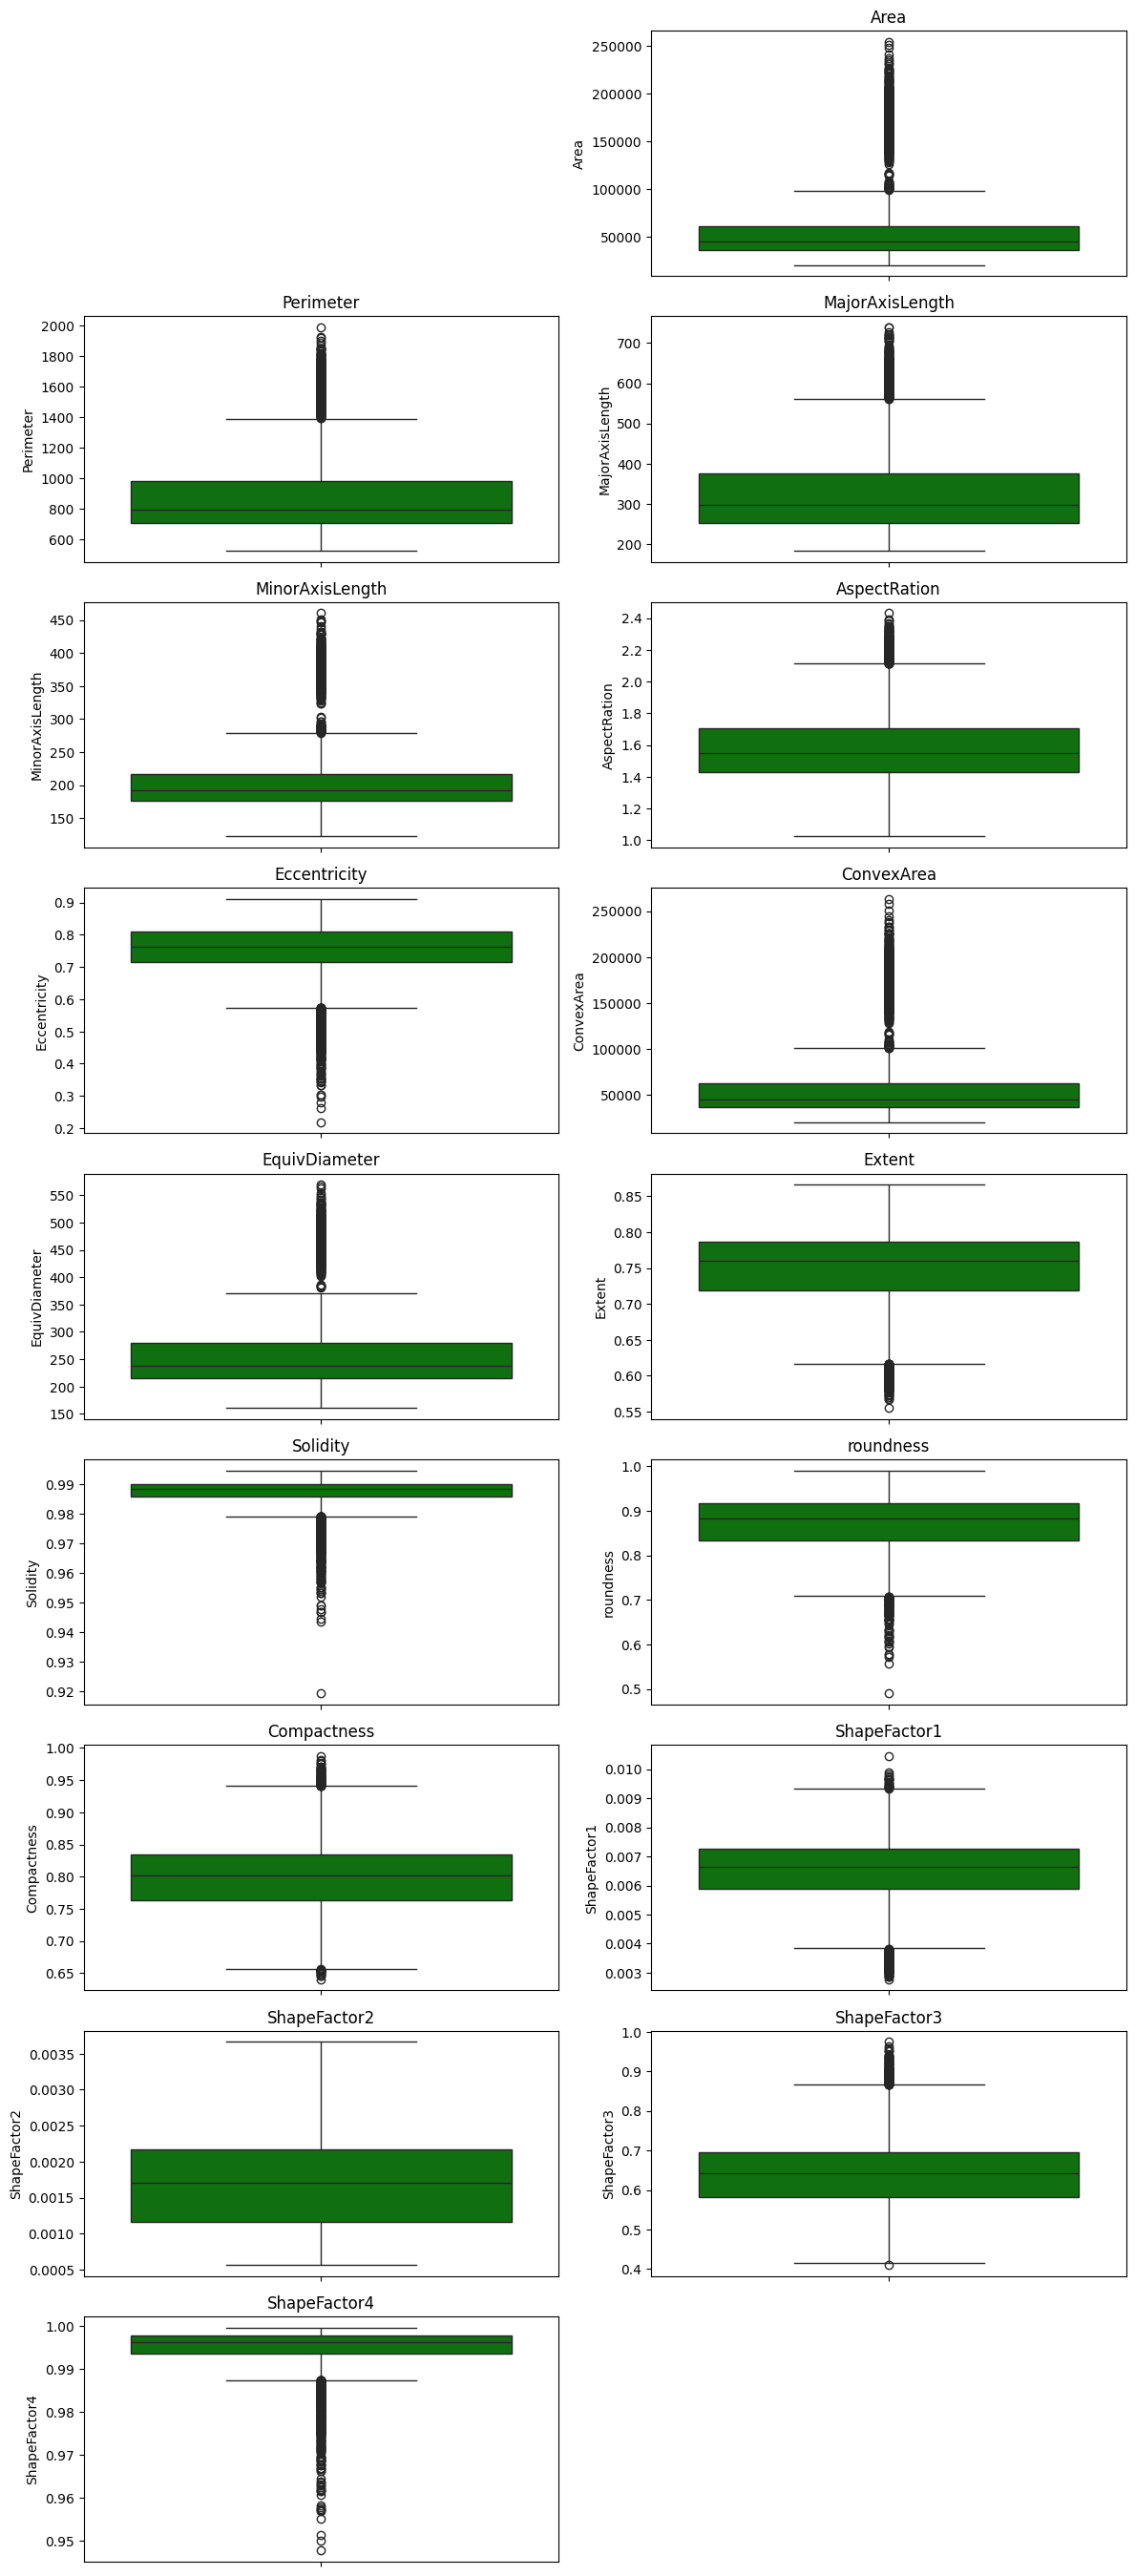

In [144]:
plt.figure(figsize=(12, len(numerical_cols) * 3))
for i, col in enumerate(numerical_cols, 2):
    plt.subplot(len(numerical_cols), 2, i)
    sns.boxplot(data=df[col],color="green")
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

#### 3.5.2 Skweness

In [145]:
skew_values = df[numerical_cols].skew()
skew_values

Area               2.947136
Perimeter          1.628018
MajorAxisLength    1.365813
MinorAxisLength    2.232013
AspectRation       0.589045
Eccentricity      -1.064932
ConvexArea         2.936102
EquivDiameter      1.947303
Extent            -0.895655
Solidity          -2.546877
roundness         -0.648725
Compactness        0.036309
ShapeFactor1      -0.530427
ShapeFactor2       0.294332
ShapeFactor3       0.242767
ShapeFactor4      -2.760125
dtype: float64

**Interpreting the Skewness Values**:  
< -1 or > 1: Highly skewed  
-1 to -0.5 or 0.5 to 1: Moderately skewed  
-0.5 to 0.5: Approximate normal distribution  

Hence the folllowing columns are highly skewed:  
- Area  
- Perimeter  
- Major Axis Length
- Minor Axis Length
- Eccentricity
- Convex Area
- Equiv Diameter
- Solidity
- shape Factor4

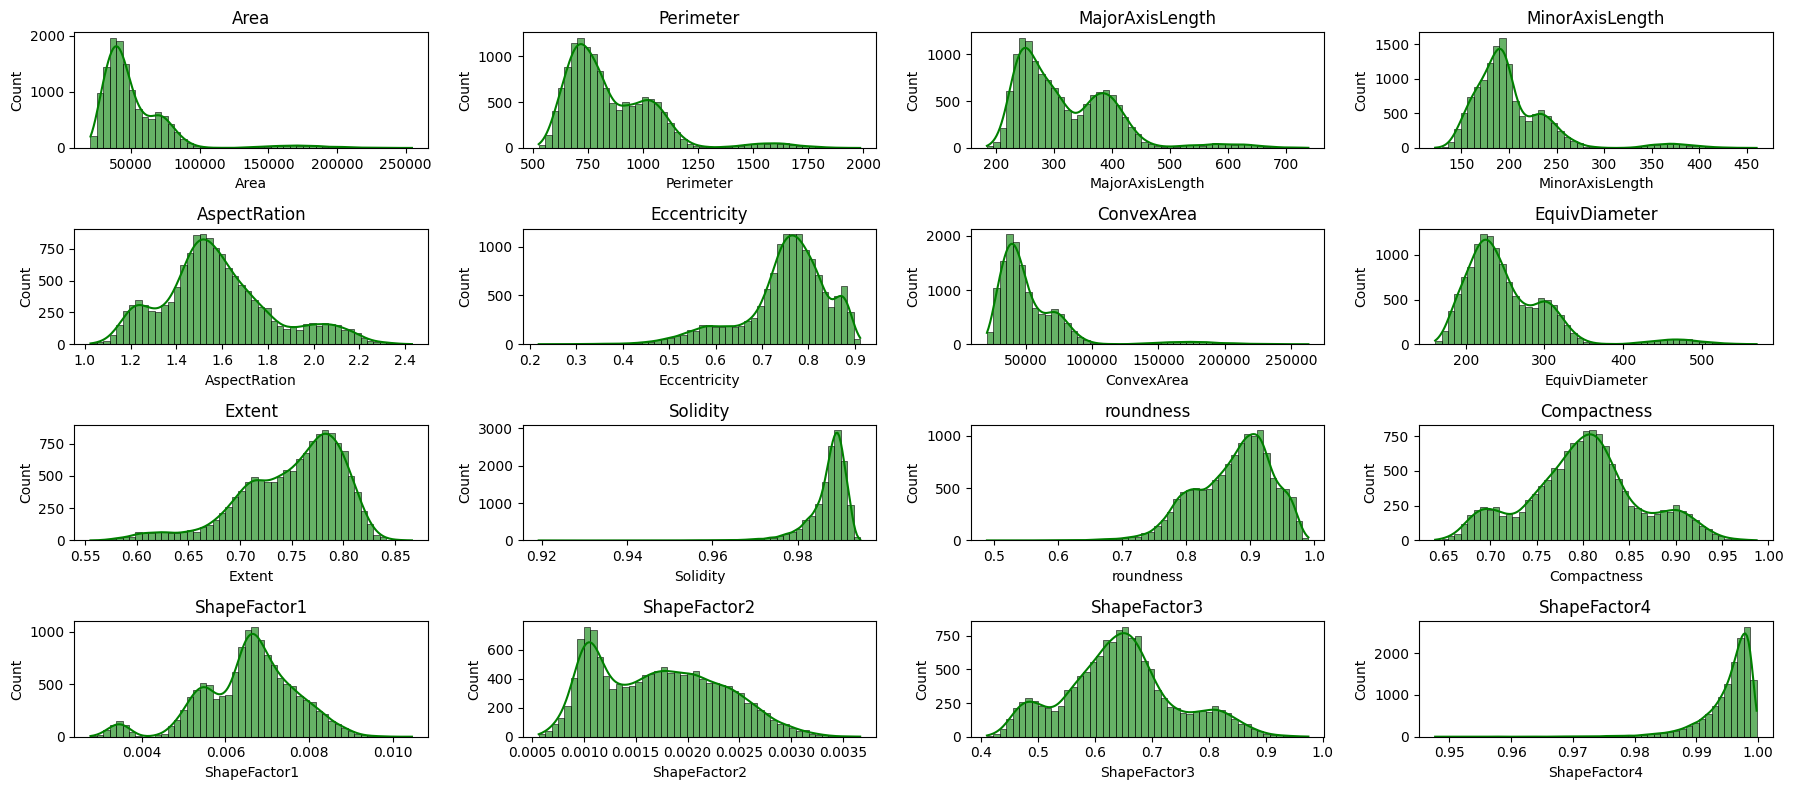

In [146]:
fig, axes = plt.subplots(4, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i], color="green", alpha=0.6)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Hence it is clear that the shape is almost normally distributed for aspect ratio, roundness, compactness, extent, ShapeFactor1, ShapeFactor2, ShapeFactor3

For columns with positive sqew, use log transformation and for columns with negative skew, use reflection&log transformation

In [147]:
#Handle Skewness
# Columns with high positive skew
pos_skew_cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']
df[pos_skew_cols] = np.log1p(df[pos_skew_cols])

# Columns with high negative skew
neg_skew_cols = ['Eccentricity', 'Solidity', 'ShapeFactor4']
df[neg_skew_cols] = np.log1p(df[neg_skew_cols].max() - df[neg_skew_cols] + 1)

Check the skew value after transformation

In [148]:
new_numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
new_skew_values = df[new_numerical_cols].skew()
new_skew_values

Area               1.073117
Perimeter          0.848386
MajorAxisLength    0.640138
MinorAxisLength    1.307883
AspectRation       0.589045
Eccentricity       0.928282
ConvexArea         1.067860
EquivDiameter      1.075826
Extent            -0.895655
Solidity           2.518403
roundness         -0.648725
Compactness        0.036309
ShapeFactor1      -0.530427
ShapeFactor2       0.294332
ShapeFactor3       0.242767
ShapeFactor4       2.736005
dtype: float64

Skewness of ShapeFactor4 is still high. Hence applying Yeo-Johnson transformation

In [149]:
from scipy.stats import yeojohnson

# Apply Yeo-Johnson transformation only on ShapeFactor4
df["ShapeFactor4"], lambda_val = yeojohnson(df["ShapeFactor4"])

# Print new skewness after transformation
print("Skewness after Yeo-Johnson transformation:")
print(df["ShapeFactor4"].skew())

Skewness after Yeo-Johnson transformation:
0.0


### 3.5.3 Box Plot after transformation

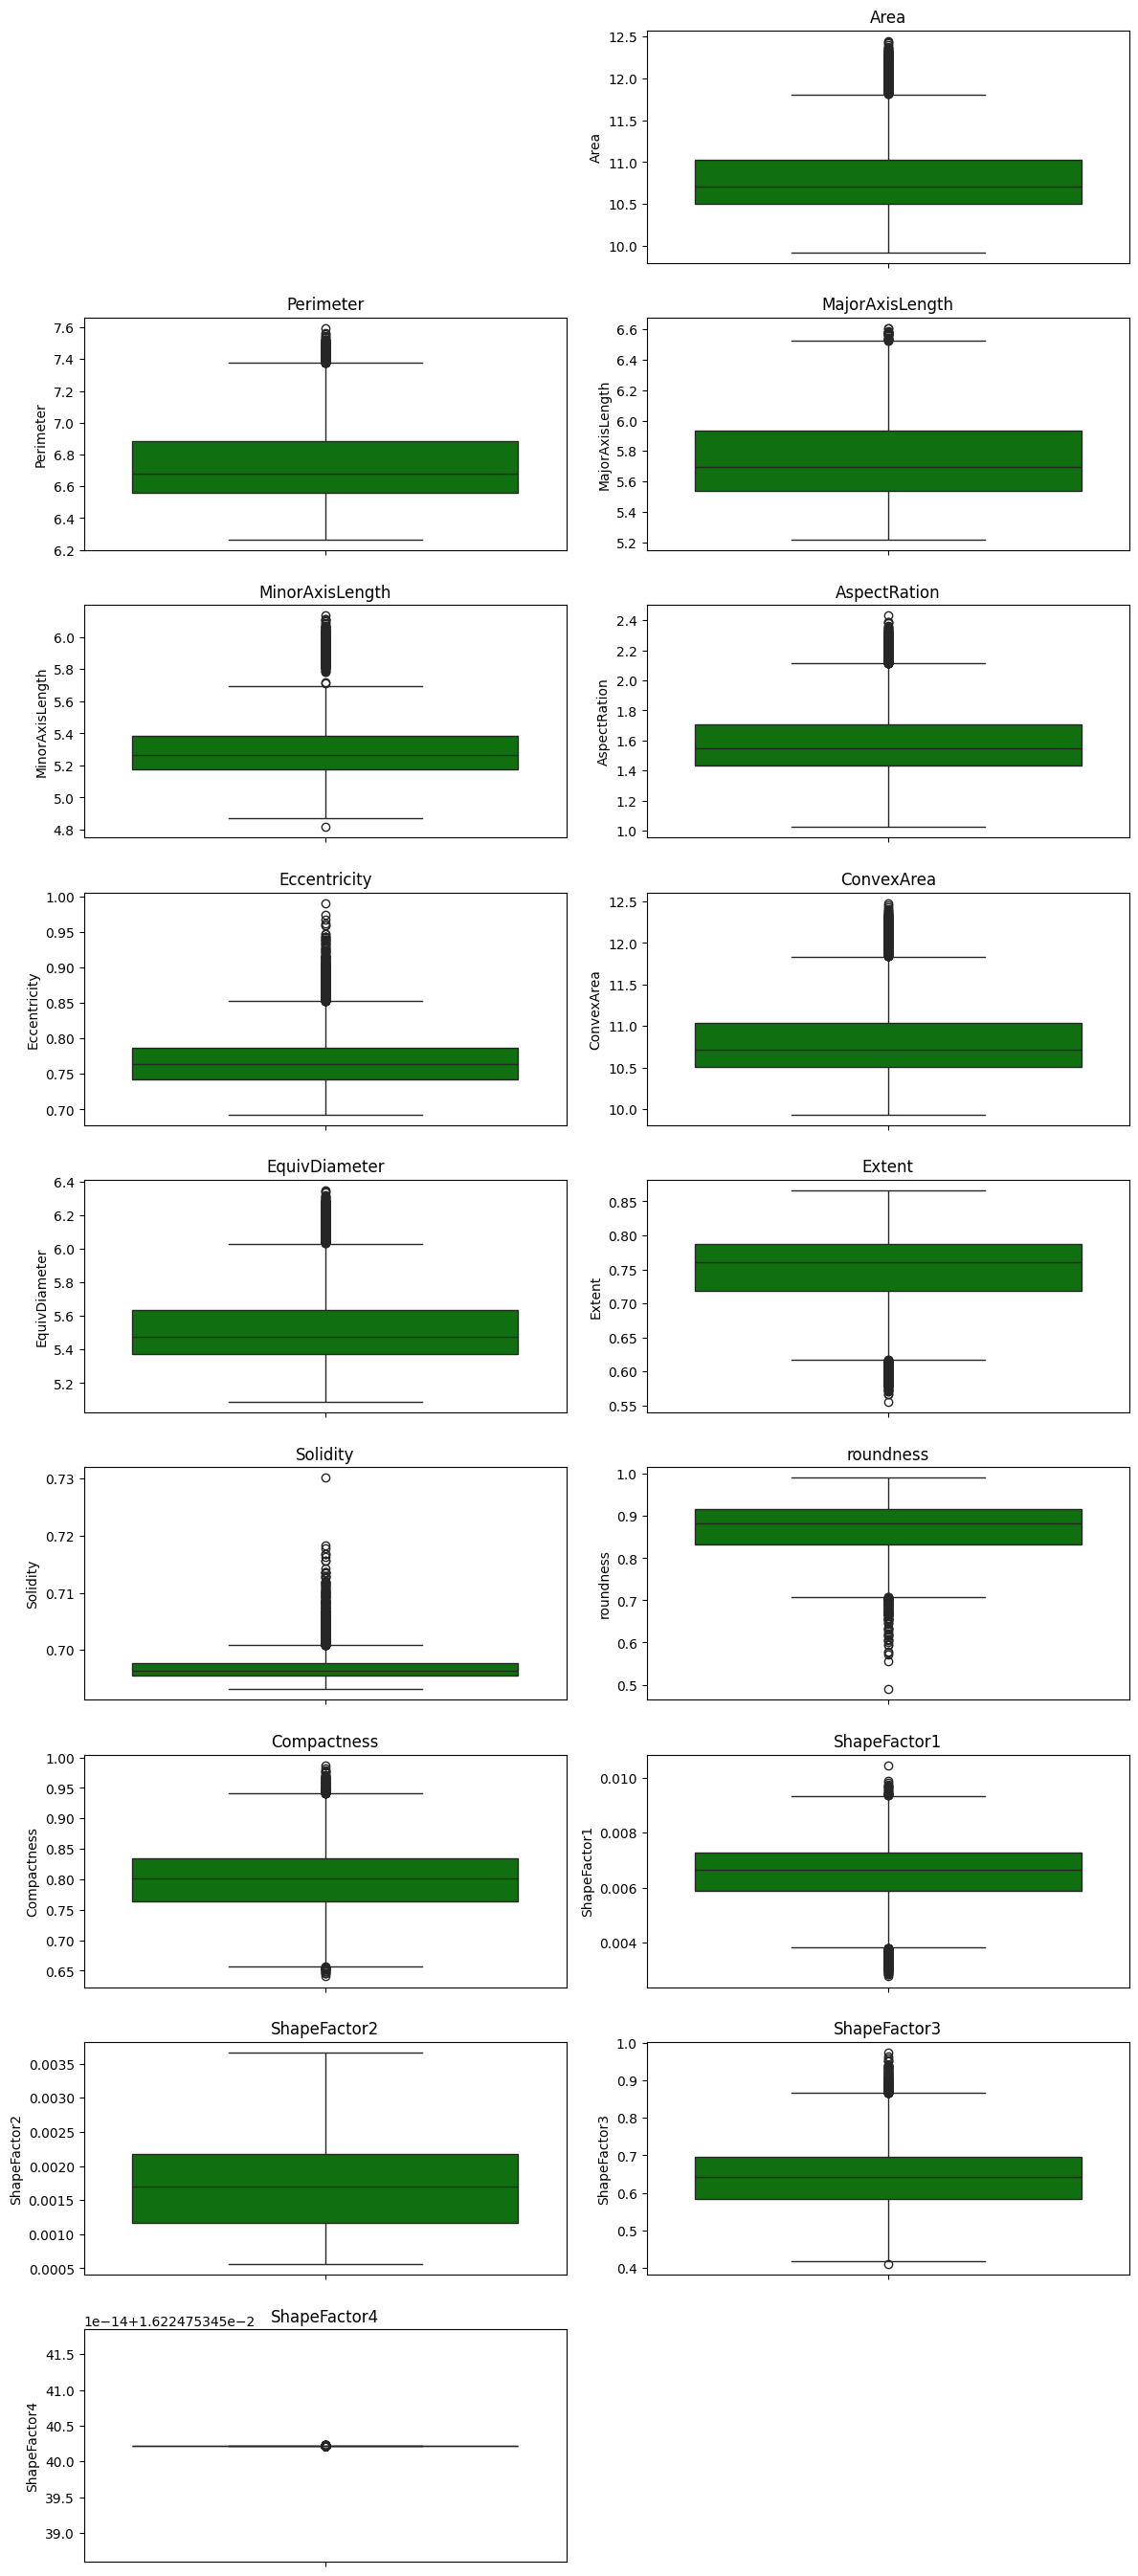

In [150]:
plt.figure(figsize=(12, len(numerical_cols) * 3))
for i, col in enumerate(numerical_cols, 2):
    plt.subplot(len(numerical_cols), 2, i)
    sns.boxplot(data=df[col], color="green")
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

### 3.5.4 IQR Method

In [151]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply to all numerical columns
outlier_dict = {}
for col in new_numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_dict[col] = len(outliers)

# Print number of outliers per column
print("Number of outliers per column:")
print(outlier_dict)


Number of outliers per column:
{'Area': 506, 'Perimeter': 230, 'MajorAxisLength': 24, 'MinorAxisLength': 526, 'AspectRation': 485, 'Eccentricity': 726, 'ConvexArea': 502, 'EquivDiameter': 506, 'Extent': 271, 'Solidity': 771, 'roundness': 98, 'Compactness': 124, 'ShapeFactor1': 533, 'ShapeFactor2': 0, 'ShapeFactor3': 202, 'ShapeFactor4': 299}


Cap Outliers

In [152]:
# Function to cap outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Apply capping to all numerical columns
for col in df_capped.select_dtypes(include=['float64', 'int64']).columns:
    df = cap_outliers(df, col)

print("Outliers capped successfully!")


Outliers capped successfully!


Verify that the outliers are removed

In [153]:
outlier_dict = {}
for col in new_numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_dict[col] = len(outliers)

# Print number of outliers per column
print("Number of outliers per column:")
print(outlier_dict)


Number of outliers per column:
{'Area': 0, 'Perimeter': 0, 'MajorAxisLength': 0, 'MinorAxisLength': 0, 'AspectRation': 0, 'Eccentricity': 0, 'ConvexArea': 0, 'EquivDiameter': 0, 'Extent': 0, 'Solidity': 0, 'roundness': 0, 'Compactness': 0, 'ShapeFactor1': 0, 'ShapeFactor2': 0, 'ShapeFactor3': 0, 'ShapeFactor4': 0}


## 3.6 Encoding

In this data set, only the class column, which is the target column is a categorical data. Hence, only that needs to be encoded

In [154]:
label_encoder = LabelEncoder()

# Encode the target column
df["Class"] = label_encoder.fit_transform(df["Class"])

# Print unique values after encoding
print("Encoded class values:", df["Class"].unique())

Encoded class values: [5 0 1 2 4 6 3]


There are only 7 varieties of dry beans. Hence values range from 0 to 6 after encoding.

## 3.6 Scaling

In [155]:
# Initialize Standard Scaler
scaler = StandardScaler()

# Scale all numerical features (excluding 'Class' as it's already encoded)
X = df.drop(columns=['Class']).columns
df[X] = scaler.fit_transform(df[X])

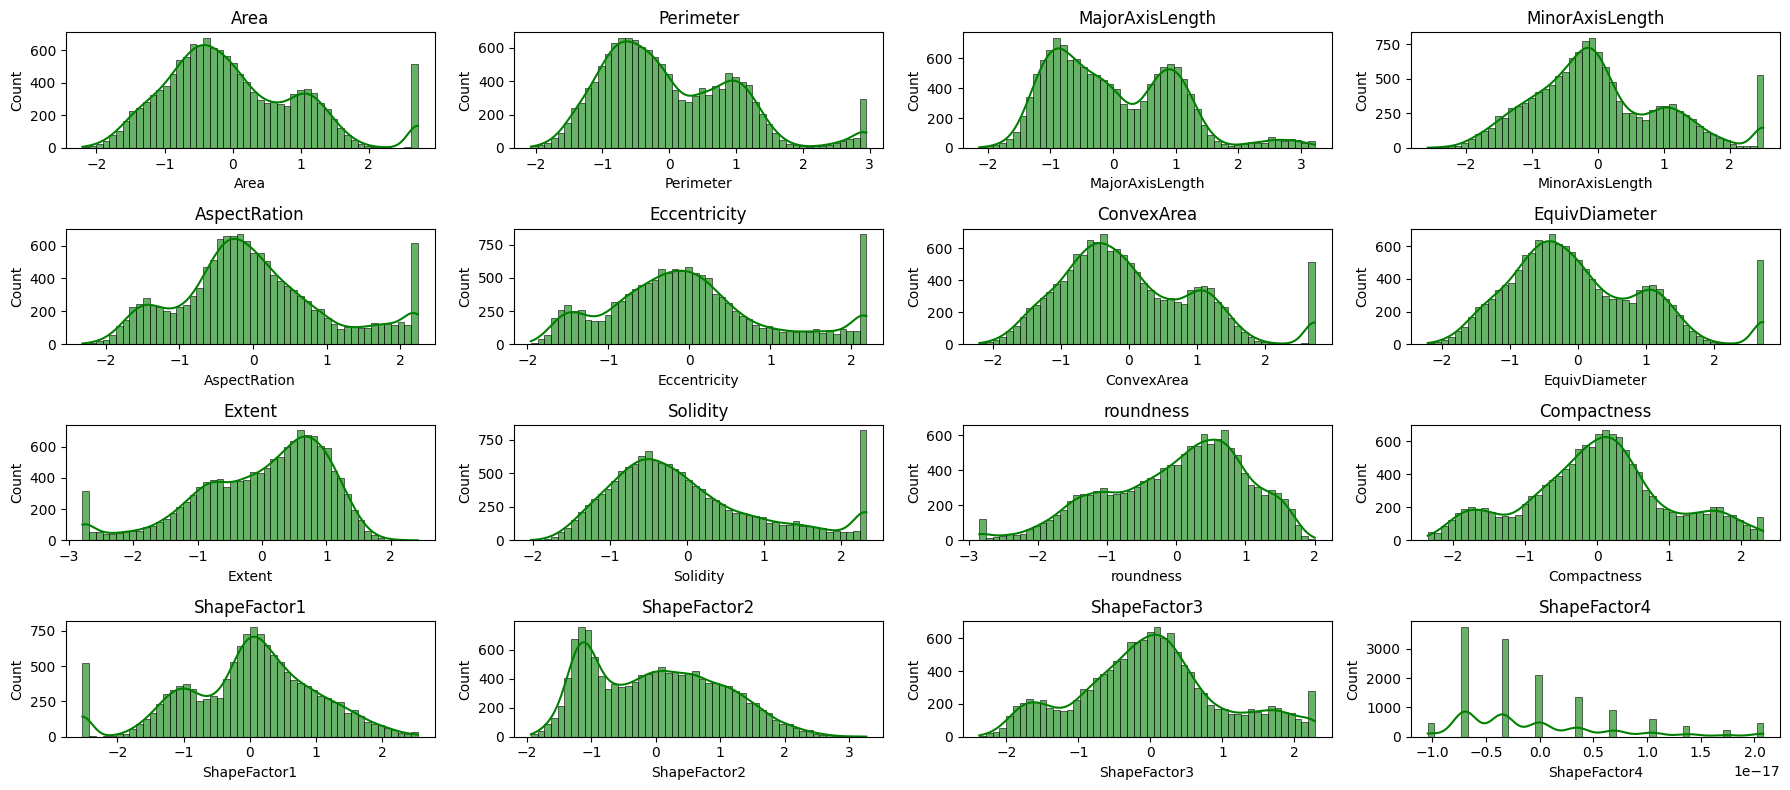

In [156]:
fig, axes = plt.subplots(4, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(X):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i], color="green", alpha=0.6)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


## 3.7 Corelaton Analysis

In [157]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Display correlation values
print(correlation_matrix)


                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.991102         0.958145         0.915520   
Perimeter        0.991102   1.000000         0.975405         0.873894   
MajorAxisLength  0.958145   0.975405         1.000000         0.765491   
MinorAxisLength  0.915520   0.873894         0.765491         1.000000   
AspectRation     0.385710   0.452651         0.617647        -0.001949   
Eccentricity    -0.391495  -0.456791        -0.619779        -0.008946   
ConvexArea       0.999933   0.991898         0.958687         0.914804   
EquivDiameter    1.000000   0.991102         0.958142         0.915522   
Extent          -0.010091  -0.052188        -0.108502         0.135778   
Solidity         0.299168   0.360868         0.338800         0.211904   
roundness       -0.537352  -0.623369        -0.669974        -0.269584   
Compactness     -0.398531  -0.465309        -0.630518        -0.009804   
ShapeFactor1    -0.907492  -0.863703  

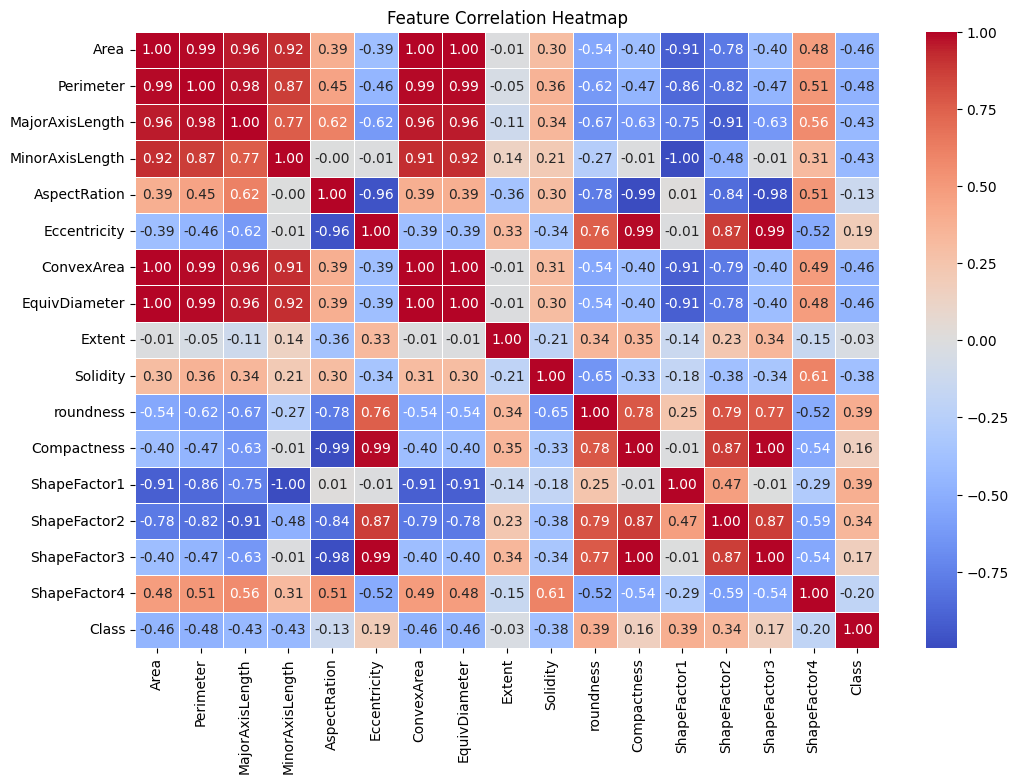

In [158]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Check Multicolinearity

In [159]:
# Set a threshold for high correlation
correlation_threshold = 0.75

# Find pairs with high correlation
high_corr_pairs = []
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if abs(correlation_matrix.loc[idx, col]) > correlation_threshold and idx != col:
            high_corr_pairs.append((idx, col, correlation_matrix.loc[idx, col]))


In [160]:
# Print highly correlated feature pairs
print("Highly Correlated Features (>|0.75|):")
for pair in high_corr_pairs:
    print(f"{pair[0]} ↔ {pair[1]} : {pair[2]:.2f}")

Highly Correlated Features (>|0.75|):
Perimeter ↔ Area : 0.99
MajorAxisLength ↔ Area : 0.96
MinorAxisLength ↔ Area : 0.92
ConvexArea ↔ Area : 1.00
EquivDiameter ↔ Area : 1.00
ShapeFactor1 ↔ Area : -0.91
ShapeFactor2 ↔ Area : -0.78
Area ↔ Perimeter : 0.99
MajorAxisLength ↔ Perimeter : 0.98
MinorAxisLength ↔ Perimeter : 0.87
ConvexArea ↔ Perimeter : 0.99
EquivDiameter ↔ Perimeter : 0.99
ShapeFactor1 ↔ Perimeter : -0.86
ShapeFactor2 ↔ Perimeter : -0.82
Area ↔ MajorAxisLength : 0.96
Perimeter ↔ MajorAxisLength : 0.98
MinorAxisLength ↔ MajorAxisLength : 0.77
ConvexArea ↔ MajorAxisLength : 0.96
EquivDiameter ↔ MajorAxisLength : 0.96
ShapeFactor1 ↔ MajorAxisLength : -0.75
ShapeFactor2 ↔ MajorAxisLength : -0.91
Area ↔ MinorAxisLength : 0.92
Perimeter ↔ MinorAxisLength : 0.87
MajorAxisLength ↔ MinorAxisLength : 0.77
ConvexArea ↔ MinorAxisLength : 0.91
EquivDiameter ↔ MinorAxisLength : 0.92
ShapeFactor1 ↔ MinorAxisLength : -1.00
Eccentricity ↔ AspectRation : -0.96
roundness ↔ AspectRation : -0.7

## 3.8 Feature Selection

In [161]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define number of features to select (choose K)
K = 10
X = df.drop(columns=['Class'])
y = df['Class']

selector = SelectKBest(score_func=f_classif, k=K)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features using K-Best:", list(selected_features))


Selected Features using K-Best: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'ConvexArea', 'EquivDiameter', 'Compactness', 'ShapeFactor1', 'ShapeFactor2']
